In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Set display options to show all columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#Linear regression models import
from sklearn.linear_model import LinearRegression

# to split the data
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# targert variable as mpg as the mpg comaprsion/distribution with other attributes

In [3]:
df.shape

(398, 9)

In [4]:
df["displacement"]

0      307.0
1      350.0
2      318.0
3      304.0
4      302.0
5      429.0
6      454.0
7      440.0
8      455.0
9      390.0
10     383.0
11     340.0
12     400.0
13     455.0
14     113.0
15     198.0
16     199.0
17     200.0
18      97.0
19      97.0
20     110.0
21     107.0
22     104.0
23     121.0
24     199.0
25     360.0
26     307.0
27     318.0
28     304.0
29      97.0
30     140.0
31     113.0
32      98.0
33     232.0
34     225.0
35     250.0
36     250.0
37     232.0
38     350.0
39     400.0
40     351.0
41     318.0
42     383.0
43     400.0
44     400.0
45     258.0
46     140.0
47     250.0
48     250.0
49     122.0
50     116.0
51      79.0
52      88.0
53      71.0
54      72.0
55      97.0
56      91.0
57     113.0
58      97.5
59      97.0
60     140.0
61     122.0
62     350.0
63     400.0
64     318.0
65     351.0
66     304.0
67     429.0
68     350.0
69     350.0
70     400.0
71      70.0
72     304.0
73     307.0
74     302.0
75     318.0
76     121.0

In [5]:
df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [7]:
df['horsepower']

0      130
1      165
2      150
3      150
4      140
5      198
6      220
7      215
8      225
9      190
10     170
11     160
12     150
13     225
14      95
15      95
16      97
17      85
18      88
19      46
20      87
21      90
22      95
23     113
24      90
25     215
26     200
27     210
28     193
29      88
30      90
31      95
32       ?
33     100
34     105
35     100
36      88
37     100
38     165
39     175
40     153
41     150
42     180
43     170
44     175
45     110
46      72
47     100
48      88
49      86
50      90
51      70
52      76
53      65
54      69
55      60
56      70
57      95
58      80
59      54
60      90
61      86
62     165
63     175
64     150
65     153
66     150
67     208
68     155
69     160
70     190
71      97
72     150
73     130
74     140
75     150
76     112
77      76
78      87
79      69
80      86
81      92
82      97
83      80
84      88
85     175
86     150
87     145
88     137
89     150
90     198

In [8]:
df[df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [9]:
df['origin'].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [10]:
df['car name'].nunique()

305

In [11]:
df.drop(columns=['car name'], inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [12]:
replace_origin_values = {1: 'America', 2: 'Europe', 3: 'Asia'}
df['origin'] = df['origin'].replace(replace_origin_values)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,America
1,15.0,8,350.0,165,3693,11.5,70,America
2,18.0,8,318.0,150,3436,11.0,70,America
3,16.0,8,304.0,150,3433,12.0,70,America
4,17.0,8,302.0,140,3449,10.5,70,America


In [13]:
df['origin'].nunique()

3

In [14]:
df["horsepower"] = df["horsepower"].replace("?", np.nan)
df["horsepower"] = df["horsepower"].astype('float')
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [15]:
hp_median = df["horsepower"].median()
hp_median

93.5

In [16]:
df["horsepower"] = df["horsepower"].replace(np.nan, hp_median)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [18]:
numeric_columns = df.select_dtypes(include='number')

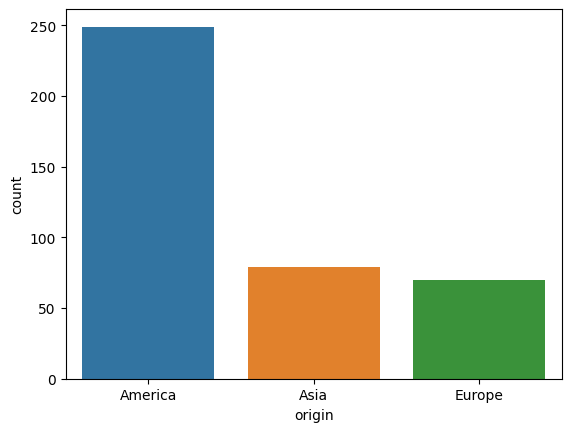

In [19]:
sns.countplot(x="origin", data=df)
plt.show()

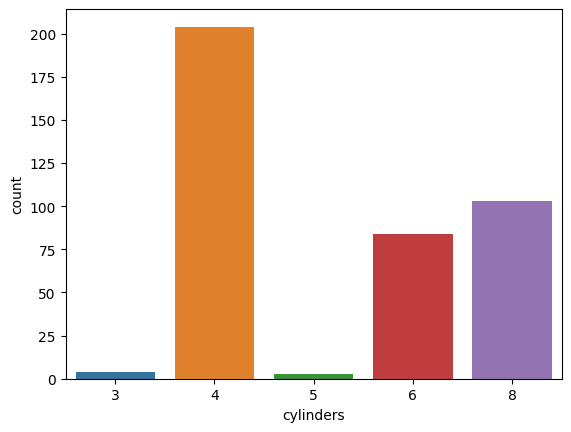

In [20]:
sns.countplot(x="cylinders", data=df)
plt.show()

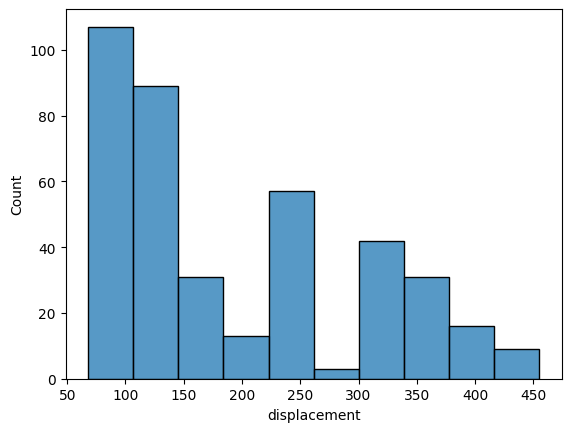

In [21]:
sns.histplot(x="displacement", data=df, bins=10)
plt.show()

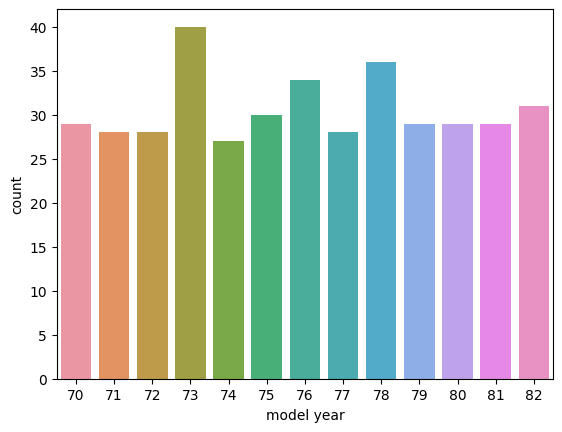

In [22]:
sns.countplot(x="model year", data=df)
plt.show()

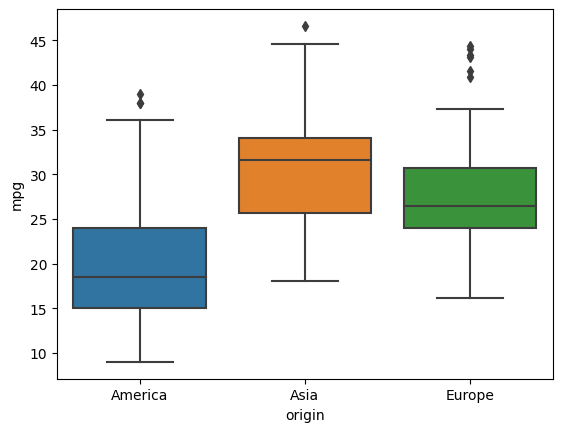

In [23]:
# sns.boxplot(x="origin", hue="mpg", data=df, bins=10)
sns.boxplot(x="origin", y="mpg", data=df)

plt.show()

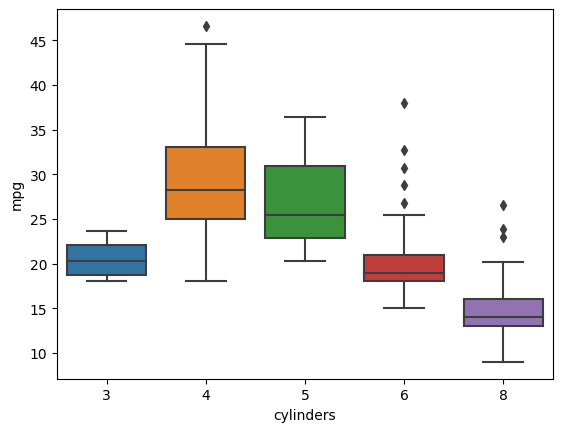

In [24]:
sns.boxplot(x="cylinders", y="mpg", data=df)

plt.show()

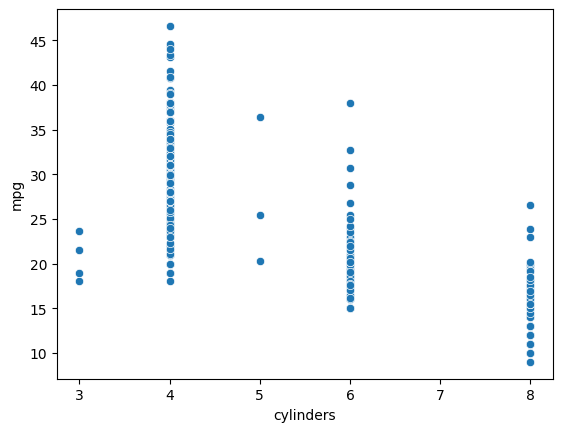

In [25]:
sns.scatterplot(x='cylinders', y='mpg', data=df)
plt.show()


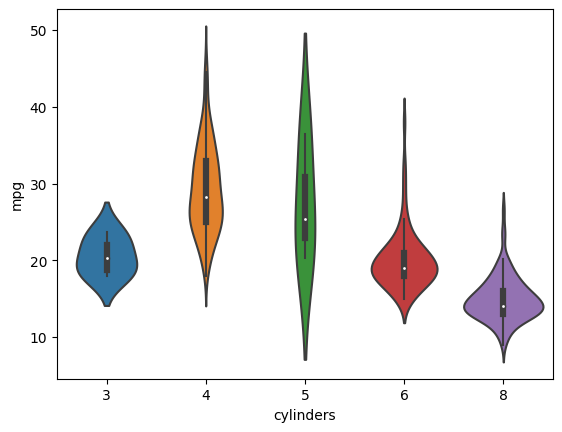

In [26]:
sns.violinplot(x='cylinders', y='mpg', data=df)
plt.show()


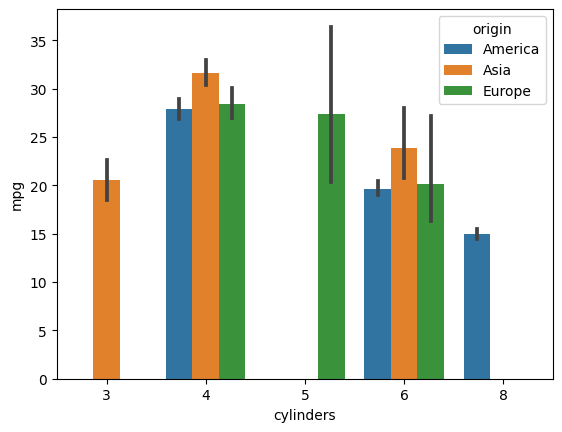

In [27]:
sns.barplot(x='cylinders', y='mpg', hue='origin', data=df)
plt.show()


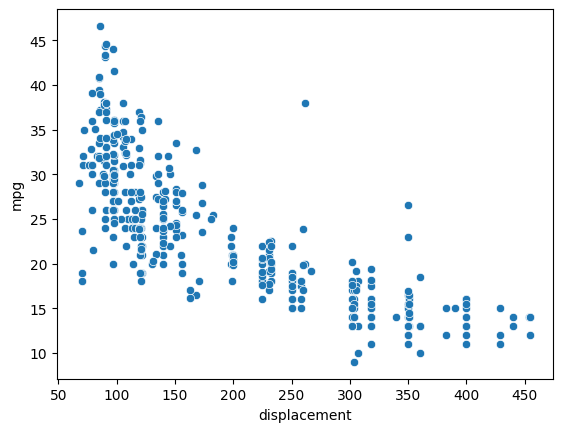

In [28]:
sns.scatterplot(x='displacement', y='mpg', data=df)
plt.show()

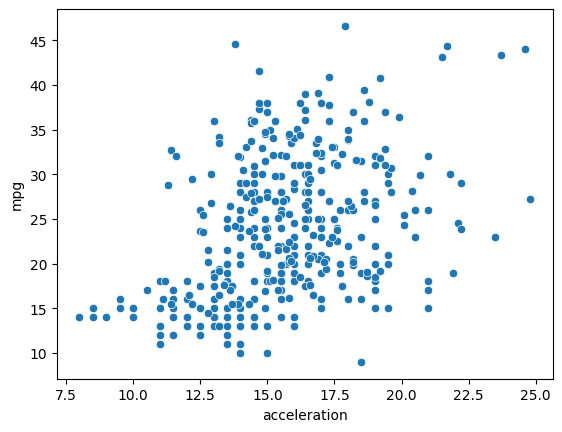

In [29]:
sns.scatterplot(x='acceleration', y='mpg', data=df)
plt.show()

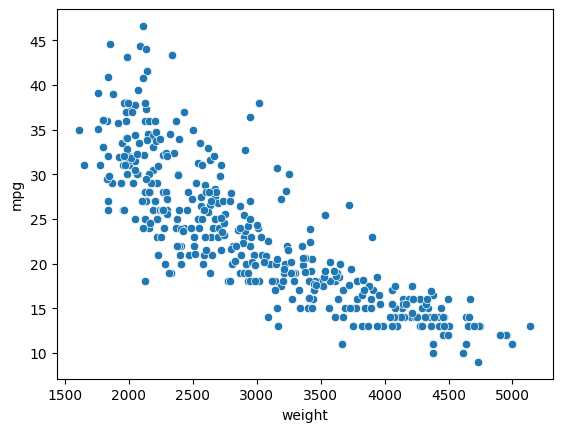

In [30]:
sns.scatterplot(x='weight', y='mpg', data=df)
plt.show()

<Axes: xlabel='weight', ylabel='mpg'>

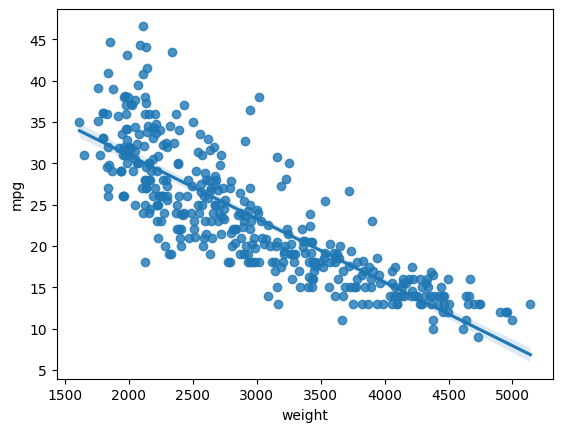

In [31]:
sns.regplot(x='weight', y='mpg', data=df)

<Axes: xlabel='weight', ylabel='mpg'>

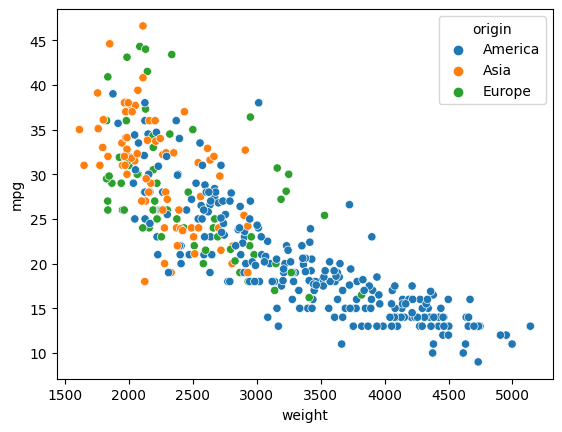

In [32]:
sns.scatterplot(x="weight", y="mpg", hue="origin", data=df)

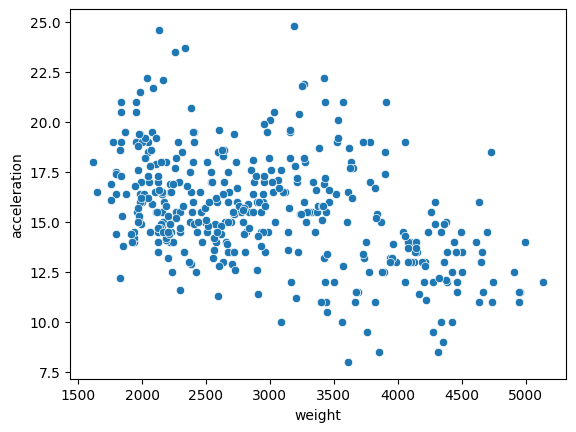

In [33]:
sns.scatterplot(x='weight', y='acceleration', data=df)
plt.show()

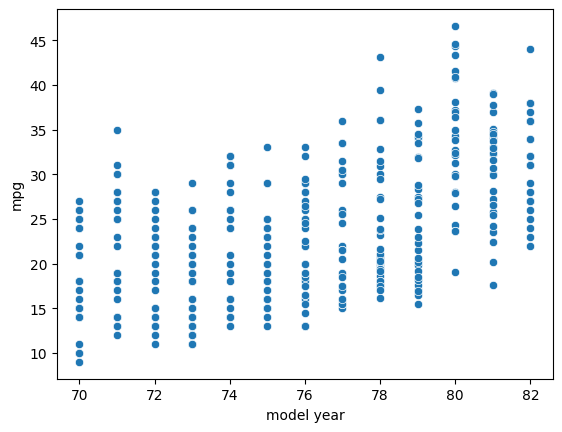

In [34]:
sns.scatterplot(x='model year', y='mpg', data=df)
plt.show()

<Axes: xlabel='acceleration', ylabel='displacement'>

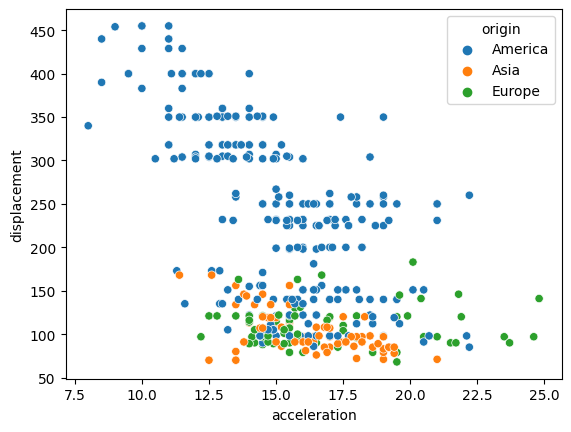

In [35]:
sns.scatterplot(x="acceleration", y="displacement", hue="origin", data=df)

<Axes: xlabel='acceleration', ylabel='weight'>

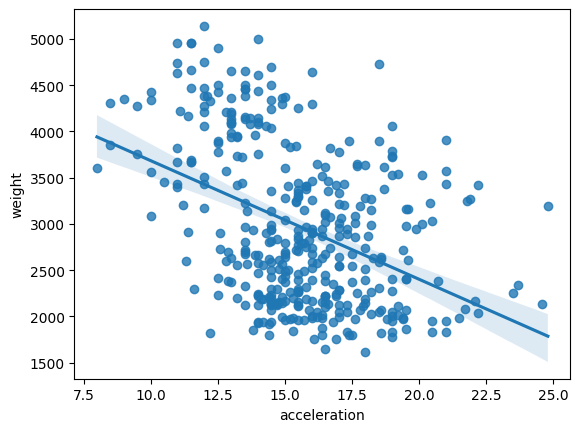

In [36]:
sns.regplot(x="acceleration", y="weight", data=df)

<Axes: xlabel='acceleration', ylabel='weight'>

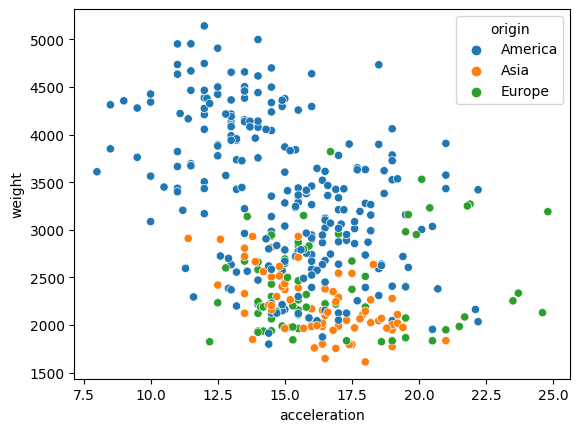

In [37]:
sns.scatterplot(x="acceleration", y="weight", hue="origin", data=df)

<Axes: xlabel='weight', ylabel='displacement'>

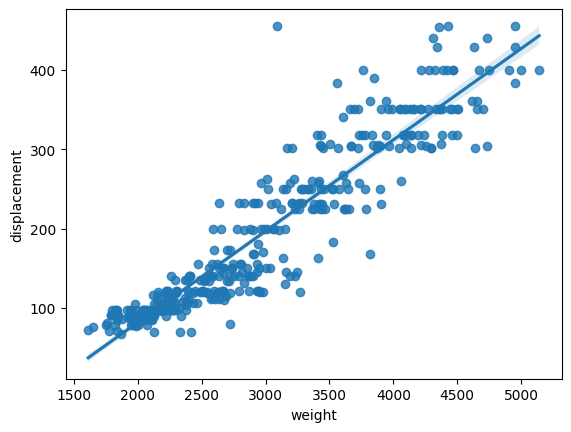

In [38]:
sns.regplot(x="weight", y="displacement", data=df)

<Axes: xlabel='weight', ylabel='displacement'>

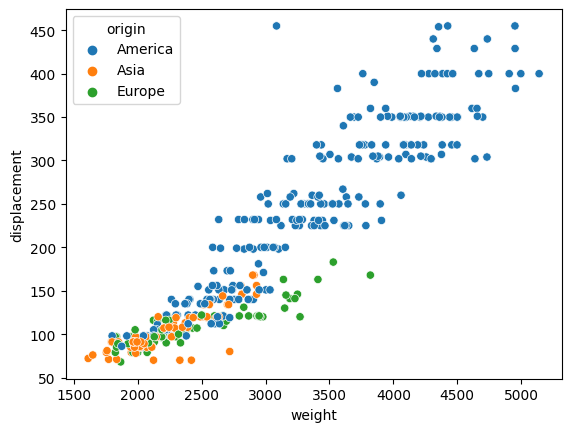

In [39]:
sns.scatterplot(x="weight", y="displacement", hue="origin", data=df)

<Axes: xlabel='acceleration', ylabel='displacement'>

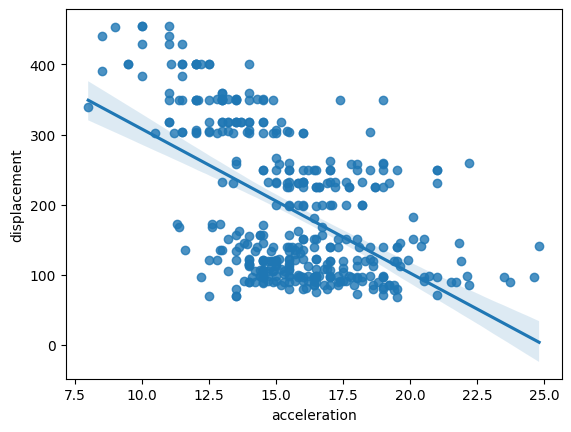

In [40]:
sns.regplot(x="acceleration", y="displacement", data=df)

<Axes: xlabel='acceleration', ylabel='displacement'>

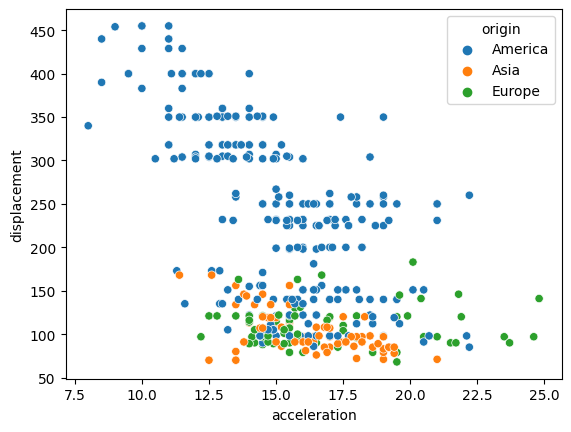

In [41]:
sns.scatterplot(x="acceleration", y="displacement", hue="origin", data=df)

In [ ]:
sns.pairplot(data=df)

plt.show()

In [ ]:
corr = df.corr(numeric_only=True) #cylinders-displacement, mpg-weight

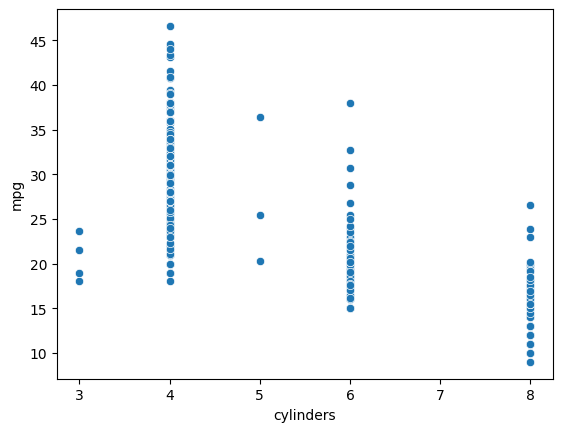

In [44]:
sns.scatterplot(x='cylinders', y='mpg', data=df)
plt.show()

<Axes: >

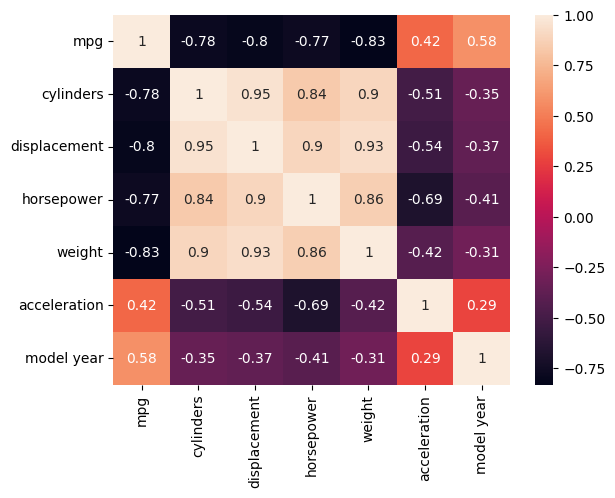

In [45]:
sns.heatmap(corr, annot=True)
# Heatmap can give visually to view the colums corrlative inverse/directly proportional

In [46]:
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000


In [17]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [18]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [19]:
df = pd.get_dummies(df, columns=["origin"])

In [20]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
311,32.1,4,98.0,70.0,2120,15.5,80,True,False,False
351,34.4,4,98.0,65.0,2045,16.2,81,True,False,False
153,18.0,6,250.0,105.0,3459,16.0,75,True,False,False
199,20.0,6,225.0,100.0,3651,17.7,76,True,False,False
394,44.0,4,97.0,52.0,2130,24.6,82,False,False,True
33,19.0,6,232.0,100.0,2634,13.0,71,True,False,False
125,20.0,6,198.0,95.0,3102,16.5,74,True,False,False
282,22.3,4,140.0,88.0,2890,17.3,79,True,False,False
184,25.0,4,140.0,92.0,2572,14.9,76,True,False,False
152,19.0,6,225.0,95.0,3264,16.0,75,True,False,False


In [21]:
# Model building
X = df.drop(["mpg"], axis=1)

In [22]:
Y = df["mpg"]

In [23]:
df[["mpg"]]

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
5,15.0
6,14.0
7,14.0
8,14.0
9,15.0


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30,random_state=1)

In [55]:
from sklearn.neighbors import KNeighborsRegressor

In [56]:
model_knn = KNeighborsRegressor()

In [57]:
model_knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [58]:
model_knn.score(X_train,Y_train)

0.7951602158207427

In [59]:
model_knn.score(X_test, Y_test)

0.709840076293826

In [60]:
model_knn = KNeighborsRegressor(n_neighbors=7)
model_knn.fit(X_train, Y_train)
print("Train:: ", model_knn.score(X_train,Y_train))
print("Test:: ", model_knn.score(X_test, Y_test))

Train::  0.7734077694299856
Test::  0.7238237282044292


In [61]:
for n in [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    model_knn = KNeighborsRegressor(n_neighbors=n)
    model_knn.fit(X_train, Y_train)
    print("\n Nneighbours ", n)
    print("Train:: ",  model_knn.score(X_train,Y_train))
    print("Test:: ", model_knn.score(X_test, Y_test))


 Nneighbours  6
Train::  0.7797949968487389
Test::  0.7367013999696599

 Nneighbours  7
Train::  0.7734077694299856
Test::  0.7238237282044292

 Nneighbours  8
Train::  0.7666953972025625
Test::  0.7128747158472601

 Nneighbours  9
Train::  0.765265165701345
Test::  0.7106230793539088

 Nneighbours  10
Train::  0.7583344437354091
Test::  0.71863818200399

 Nneighbours  11
Train::  0.7536856024227475
Test::  0.7237372936440278

 Nneighbours  12
Train::  0.7495085943369275
Test::  0.7294373235321632

 Nneighbours  13
Train::  0.7399028448212206
Test::  0.7258830608230804

 Nneighbours  14
Train::  0.7330845132013383
Test::  0.7233273214568485

 Nneighbours  15
Train::  0.7297127740664071
Test::  0.7263806611070514

 Nneighbours  16
Train::  0.7301091171010975
Test::  0.7333769088244027

 Nneighbours  17
Train::  0.724391954027613
Test::  0.7351832073193807

 Nneighbours  18
Train::  0.7197251625107919
Test::  0.7388903721758294

 Nneighbours  19
Train::  0.7176388257963875
Test::  0.739

In [62]:
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor(max_depth=4)
model_dtr.fit(X_train, Y_train)
# Fit the model with the train data
print("DecisionTreeClassifier, criterion:")
print("Test::", model_dtr.score(X_test, Y_test))
print("Train::", model_dtr.score(X_train, Y_train))

DecisionTreeClassifier, criterion:
Test:: 0.7604748481443313
Train:: 0.8966636708374218


In [63]:
from sklearn.ensemble import BaggingRegressor

for n in [1,2,3,5,6,10,20,22,25,30,40,50, 100]:
    modle_lgr = BaggingRegressor(n_estimators=n, estimator=model_dtr)
    modle_lgr.fit(X_train, Y_train)
    print("\n n_estimators ", n)
    print("Train:: ",  modle_lgr.score(X_train,Y_train))
    print("Test:: ", modle_lgr.score(X_test, Y_test))


 n_estimators  1
Train::  0.82509380779059
Test::  0.6838857731446725

 n_estimators  2
Train::  0.8997985012947235
Test::  0.8268955213009285

 n_estimators  3
Train::  0.9020148274132617
Test::  0.8320863158844214

 n_estimators  5
Train::  0.9186757931865249
Test::  0.8489238841383968

 n_estimators  6
Train::  0.9141041955679211
Test::  0.8836999169591108

 n_estimators  10
Train::  0.9163927261069134
Test::  0.8710764361565536

 n_estimators  20
Train::  0.9199958966791544
Test::  0.8658542182611335

 n_estimators  22
Train::  0.9239611689241042
Test::  0.8762800976155843

 n_estimators  25
Train::  0.9244207043598239
Test::  0.8752187022701543

 n_estimators  30
Train::  0.9266946540411871
Test::  0.8721505188679317

 n_estimators  40
Train::  0.9251515385831504
Test::  0.877973453351217

 n_estimators  50
Train::  0.9251781763784281
Test::  0.878663292212409

 n_estimators  100
Train::  0.9259388283937958
Test::  0.874122420434578


In [64]:
for n in [1,2,3,5,6,10,20,22,25,30,40,50, 100]:
    modle_lgr = BaggingRegressor(n_estimators=n)
    modle_lgr.fit(X_train, Y_train)
    print("\n n_estimators ", n)
    print("Train:: ",  modle_lgr.score(X_train,Y_train))
    print("Test:: ", modle_lgr.score(X_test, Y_test))


 n_estimators  1
Train::  0.8907079046225134
Test::  0.7319297101367682

 n_estimators  2
Train::  0.9246607595698022
Test::  0.8007474451730772

 n_estimators  3
Train::  0.9605368117513917
Test::  0.7886988907327609

 n_estimators  5
Train::  0.9639386869656071
Test::  0.8694695421187444

 n_estimators  6
Train::  0.9705543171375841
Test::  0.8272937459419336

 n_estimators  10
Train::  0.9754921906053905
Test::  0.8379845847361322

 n_estimators  20
Train::  0.9804028782962135
Test::  0.8659930583279752

 n_estimators  22
Train::  0.9830649525203187
Test::  0.8558966728994707

 n_estimators  25
Train::  0.9813947561085211
Test::  0.8727126534325024

 n_estimators  30
Train::  0.979123393990645
Test::  0.8720416556383548

 n_estimators  40
Train::  0.9821114962782935
Test::  0.8633198204740486

 n_estimators  50
Train::  0.981085061566854
Test::  0.8714876301180454

 n_estimators  100
Train::  0.9816890208979452
Test::  0.8682475053922925


In [65]:

std_df = df

# Standardization Approach
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()


std_df["cylinders"] = std_scale.fit_transform(std_df[["cylinders"]])

std_df["displacement"] = std_scale.fit_transform(std_df[["displacement"]])

std_df["horsepower"] = std_scale.fit_transform(std_df[["horsepower"]])

std_df["weight"] = std_scale.fit_transform(std_df[["weight"]])

std_df["acceleration"] = std_scale.fit_transform(std_df[["acceleration"]])

std_df["model year"] = std_scale.fit_transform(std_df[["model year"]])


Y = std_df[["mpg"]]
X = std_df.drop(["mpg"], axis = 1)
X_std_train, X_std_test, Y_std_train, Y_std_test = train_test_split(X,Y,test_size=.30,random_state=1)

In [66]:
modle_lgr = BaggingRegressor()
modle_lgr.fit(X_std_train, Y_std_train)
print("\n Nneighbours ", n)
print("Train:: ",  modle_lgr.score(X_std_train,Y_std_train))
print("Test:: ", modle_lgr.score(X_std_test, Y_std_test))


 Nneighbours  100
Train::  0.9759840447915209
Test::  0.8614544572410078


In [67]:
for n in [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    model_knn = KNeighborsRegressor(n_neighbors=n)
    model_knn.fit(X_std_train, Y_std_train)
    print("\n Standard n_neighbors: ", n)
    print("Train:: ",  model_knn.score(X_std_train,Y_std_train))
    print("Test:: ", model_knn.score(X_std_test, Y_std_test))


 Standard n_neighbors:  6
Train::  0.896004427531333
Test::  0.8749729132307863

 Standard n_neighbors:  7
Train::  0.8808775013436617
Test::  0.8847633291185653

 Standard n_neighbors:  8
Train::  0.8715938528543327
Test::  0.8943533377408572

 Standard n_neighbors:  9
Train::  0.8670735569873248
Test::  0.900443775979044

 Standard n_neighbors:  10
Train::  0.8635694922354836
Test::  0.9009761071534299

 Standard n_neighbors:  11
Train::  0.8531488451079409
Test::  0.8970336057662911

 Standard n_neighbors:  12
Train::  0.8517073501825747
Test::  0.8950241895954594

 Standard n_neighbors:  13
Train::  0.8503930330986114
Test::  0.8932842135591522

 Standard n_neighbors:  14
Train::  0.8444715288177265
Test::  0.8923320212666139

 Standard n_neighbors:  15
Train::  0.83543538958178
Test::  0.8917587189227872

 Standard n_neighbors:  16
Train::  0.8311814623199802
Test::  0.89190884181809

 Standard n_neighbors:  17
Train::  0.8242744824831727
Test::  0.8891260792950674

 Standard n_n

In [68]:
for n in [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    model_knn = KNeighborsRegressor(n_neighbors=n, p=1)
    model_knn.fit(X_std_train, Y_std_train)
    print("\n n_neighbors: p=1 with std ", n)
    print("Train:: ",  model_knn.score(X_std_train,Y_std_train))
    print("Test:: ", model_knn.score(X_std_test, Y_std_test))


 n_neighbors: p=1 with std  5
Train::  0.9069566844815913
Test::  0.879290077455451

 n_neighbors: p=1 with std  6
Train::  0.8973378163355921
Test::  0.8821638239158796

 n_neighbors: p=1 with std  7
Train::  0.8844421221700064
Test::  0.8778763336105477

 n_neighbors: p=1 with std  8
Train::  0.8805234011798884
Test::  0.8865620313858272

 n_neighbors: p=1 with std  9
Train::  0.8715898111503992
Test::  0.8920987450554895

 n_neighbors: p=1 with std  10
Train::  0.863771840507892
Test::  0.8968887974158617

 n_neighbors: p=1 with std  11
Train::  0.8592306603522428
Test::  0.899023133900113

 n_neighbors: p=1 with std  12
Train::  0.8505413886838584
Test::  0.8964176844030745

 n_neighbors: p=1 with std  13
Train::  0.8474387769495991
Test::  0.891343401032511

 n_neighbors: p=1 with std  14
Train::  0.8474941631101149
Test::  0.8920005937886576

 n_neighbors: p=1 with std  15
Train::  0.8467333744865955
Test::  0.8868342266919211

 n_neighbors: p=1 with std  16
Train::  0.840733994

In [69]:
for n in [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    model_knn = KNeighborsRegressor(n_neighbors=n, p=1)
    model_knn.fit(X_train, Y_train)
    print("\n n_neighbors: p=1 ", n)
    print("Train:: ",  model_knn.score(X_train,Y_train))
    print("Test:: ", model_knn.score(X_test, Y_test))


 n_neighbors: p=1  6
Train::  0.8033234746804192
Test::  0.7603983143560851

 n_neighbors: p=1  7
Train::  0.7926190555604327
Test::  0.7604589723135509

 n_neighbors: p=1  8
Train::  0.7838351600084241
Test::  0.7562158478658809

 n_neighbors: p=1  9
Train::  0.7746805543814953
Test::  0.7506406283655003

 n_neighbors: p=1  10
Train::  0.7671918876418296
Test::  0.7498552957205303

 n_neighbors: p=1  11
Train::  0.766001924279643
Test::  0.7514302285909623

 n_neighbors: p=1  12
Train::  0.7595194775983485
Test::  0.7487390567512375

 n_neighbors: p=1  13
Train::  0.7529443513175629
Test::  0.752377794954759

 n_neighbors: p=1  14
Train::  0.7472323457346339
Test::  0.7482869898539124

 n_neighbors: p=1  15
Train::  0.7449162529409856
Test::  0.7447521444414844

 n_neighbors: p=1  16
Train::  0.7407913552915194
Test::  0.7447820473300224

 n_neighbors: p=1  17
Train::  0.7363845316021661
Test::  0.746396994024468

 n_neighbors: p=1  18
Train::  0.7341566528437666
Test::  0.7434141465

In [70]:
for n in [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    model_knn = KNeighborsRegressor(n_neighbors=n, weights='distance')
    model_knn.fit(X_train, Y_train)
    print("\n n_neighbors: ", n, "weights:distance ")
    print("Train:: ",  model_knn.score(X_train,Y_train))
    print("Test:: ", model_knn.score(X_test, Y_test))


 n_neighbors:  6 weights:distance 
Train::  1.0
Test::  0.7293478803040441

 n_neighbors:  7 weights:distance 
Train::  1.0
Test::  0.720952303906144

 n_neighbors:  8 weights:distance 
Train::  1.0
Test::  0.7152625450457031

 n_neighbors:  9 weights:distance 
Train::  1.0
Test::  0.7157697666585392

 n_neighbors:  10 weights:distance 
Train::  1.0
Test::  0.7221118231387201

 n_neighbors:  11 weights:distance 
Train::  1.0
Test::  0.7261558688506178

 n_neighbors:  12 weights:distance 
Train::  1.0
Test::  0.7294356434937286

 n_neighbors:  13 weights:distance 
Train::  1.0
Test::  0.7271842131330618

 n_neighbors:  14 weights:distance 
Train::  1.0
Test::  0.7264398748991845

 n_neighbors:  15 weights:distance 
Train::  1.0
Test::  0.7282138738519686

 n_neighbors:  16 weights:distance 
Train::  1.0
Test::  0.7330461446110351

 n_neighbors:  17 weights:distance 
Train::  1.0
Test::  0.7339719336376616

 n_neighbors:  18 weights:distance 
Train::  1.0
Test::  0.7365671797511277

 n_

In [71]:
for n in [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
    model_knn = KNeighborsRegressor(n_neighbors=n, weights='distance')
    model_knn.fit(X_std_train, Y_std_train)
    print("\n n_neighbors: ", n, "weights:distance ")
    print("Train:: ",  model_knn.score(X_std_train,Y_std_train))
    print("Test:: ", model_knn.score(X_std_test, Y_std_test))


 n_neighbors:  6 weights:distance 
Train::  1.0
Test::  0.8734396640563722

 n_neighbors:  7 weights:distance 
Train::  1.0
Test::  0.8815591221559199

 n_neighbors:  8 weights:distance 
Train::  1.0
Test::  0.8898370971358774

 n_neighbors:  9 weights:distance 
Train::  1.0
Test::  0.8964769430174924

 n_neighbors:  10 weights:distance 
Train::  1.0
Test::  0.8985860582800127

 n_neighbors:  11 weights:distance 
Train::  1.0
Test::  0.8973181299662034

 n_neighbors:  12 weights:distance 
Train::  1.0
Test::  0.8962814109235568

 n_neighbors:  13 weights:distance 
Train::  1.0
Test::  0.8952600173282563

 n_neighbors:  14 weights:distance 
Train::  1.0
Test::  0.8948442029782459

 n_neighbors:  15 weights:distance 
Train::  1.0
Test::  0.8948689412065957

 n_neighbors:  16 weights:distance 
Train::  1.0
Test::  0.8954574146741952

 n_neighbors:  17 weights:distance 
Train::  1.0
Test::  0.8939901900266769

 n_neighbors:  18 weights:distance 
Train::  1.0
Test::  0.8950416270077937

 n

In [72]:
from sklearn.svm import SVR


kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} 
model_svr = SVR()


for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model_svr = SVR(kernel=kernel)
    model_svr.fit(X_std_train, Y_std_train)
    print("\n Kernel: ", kernel)
    print("train: ",model_svr.score(X_std_train, Y_std_train))
    print("test: ", model_svr.score(X_std_test, Y_std_test))
    
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model_svr = SVR(kernel=kernel)
    model_svr.fit(X_std_train, Y_std_train)
    print("\n Kernel: ", kernel)
    print("train: ",model_svr.score(X_std_train, Y_std_train))
    print("test: ", model_svr.score(X_std_test, Y_std_test))


 Kernel:  linear
train:  0.7916866677473978
test:  0.8513839560491775

 Kernel:  poly
train:  0.8151553730174735
test:  0.8242792293019352

 Kernel:  rbf
train:  0.828212193174793
test:  0.8808379306040338

 Kernel:  sigmoid
train:  0.5678330109710632
test:  0.5792377537413769

 Kernel:  linear
train:  0.7916866677473978
test:  0.8513839560491775

 Kernel:  poly
train:  0.8151553730174735
test:  0.8242792293019352

 Kernel:  rbf
train:  0.828212193174793
test:  0.8808379306040338

 Kernel:  sigmoid
train:  0.5678330109710632
test:  0.5792377537413769


In [73]:
model_lr = LinearRegression()

In [74]:
model_lr.fit(X_train, Y_train)

LinearRegression()

In [75]:
model_lr.score(X_train,Y_train)

0.8141025501610559

In [76]:
model_lr.score(X_test, Y_test)

0.8433135132808827

In [77]:
# without the Randomm state: 1

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30,random_state=2)

In [78]:
model_lr.fit(X_train, Y_train)

LinearRegression()

In [79]:
print(model_lr.score(X_train,Y_train))
print(model_lr.score(X_test, Y_test))

0.8195425758249515
0.8254870925859882


In [80]:
# without the Randomm state: 5
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30,random_state=5)
model_lr.fit(X_train, Y_train)
print(model_lr.score(X_train,Y_train))
print(model_lr.score(X_test, Y_test))

0.8411816443315627
0.7670485293494335


In [81]:
# without the Randomm state
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30, random_state=1)
model_lr.fit(X_train, Y_train)
print("Train:: ", model_lr.score(X_train,Y_train))
print("Test:: ", model_lr.score(X_test, Y_test))

Train::  0.8141025501610559
Test::  0.8433135132808831


In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,Y,test_size=.30)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30,random_state=1)

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

print(y_pred)

[[22.10237357]
 [29.88403534]
 [17.2878372 ]
 [23.75879473]
 [23.14868405]
 [15.90829384]
 [32.77666079]
 [37.28200519]
 [17.61060214]
 [13.14483865]
 [30.68372177]
 [18.84254492]
 [20.26438524]
 [25.14979198]
 [40.6988245 ]
 [21.33690573]
 [13.55098108]
 [19.87915001]
 [13.5210595 ]
 [35.49811023]
 [22.81429971]
 [32.34866592]
 [19.91864154]
 [24.27956708]
 [22.49107207]
 [30.5897075 ]
 [33.21882414]
 [35.0718745 ]
 [16.3381896 ]
 [30.83781199]
 [23.53108436]
 [14.64013963]
 [18.76720566]
 [26.43955463]
 [24.7322284 ]
 [13.31699125]
 [27.47516494]
 [13.30405811]
 [34.37087418]
 [23.64520474]
 [26.46157177]
 [24.51598408]
 [18.48999254]
 [34.16678801]
 [23.56017   ]
 [21.07219358]
 [18.8010381 ]
 [13.89690843]
 [27.61416091]
 [17.82386206]
 [23.30418861]
 [26.15160389]
 [16.6374732 ]
 [13.83897998]
 [30.37551473]
 [23.04093519]
 [13.1754873 ]
 [13.59912514]
 [31.33214651]
 [38.27933549]
 [37.6549164 ]
 [38.60966133]
 [16.48228537]
 [24.25787901]
 [17.67760863]
 [33.75710016]
 [24.34960

In [83]:
poly_clf.score(X_train2, Y_train)

0.9026446935642732

In [84]:
poly_clf.score(X_test2, Y_test)

0.8668600518003838

In [85]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)


In [86]:
print("Train:: ", poly_clf.score(X_train2, Y_train))
print("Test:: ", poly_clf.score(X_test2, Y_test))

Train::  0.9026446935642732
Test::  0.8668600518003838


In [87]:
poly = PolynomialFeatures(degree=3, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

print("Train:: ", poly_clf.score(X_train2, Y_train))
print("Test:: ", poly_clf.score(X_test2, Y_test))

Train::  0.9398357616713937
Test::  0.8077120146716641


In [88]:
poly = PolynomialFeatures(degree=4, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

print("Train:: ", poly_clf.score(X_train2, Y_train))
print("Test:: ", poly_clf.score(X_test2, Y_test))

Train::  0.9611883338563117
Test::  -0.7872883188711417


In [89]:
poly = PolynomialFeatures(degree=5, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

print("Train:: ", poly_clf.score(X_train2, Y_train))
print("Test:: ", poly_clf.score(X_test2, Y_test))

Train::  0.965166848852931
Test::  -2.291706884393323


In [90]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

print("Train:: ", poly_clf.score(X_train2, Y_train))
print("Test:: ", poly_clf.score(X_test2, Y_test))

Train::  0.9026446935642732
Test::  0.8668600518003838


In [91]:
df.dtypes

mpg               float64
cylinders         float64
displacement      float64
horsepower        float64
weight            float64
acceleration      float64
model year        float64
origin_America       bool
origin_Asia          bool
origin_Europe        bool
dtype: object

In [92]:
numeric_columns = df.select_dtypes(include='number')
numeric_columns

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,15.0,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,18.0,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,16.0,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,17.0,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426
5,15.0,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.627426
6,14.0,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.627426
7,14.0,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.627426
8,14.0,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.627426
9,15.0,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.627426


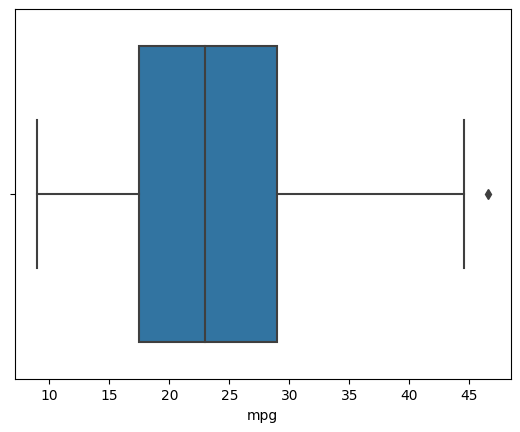

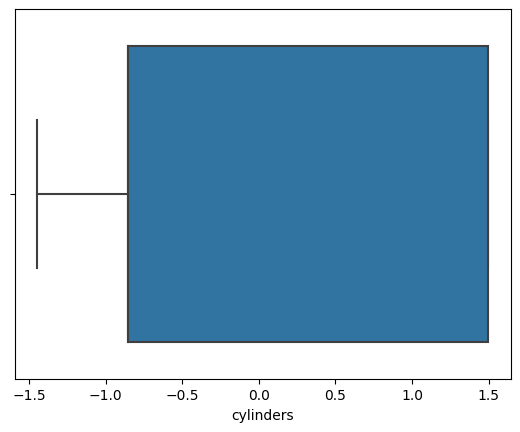

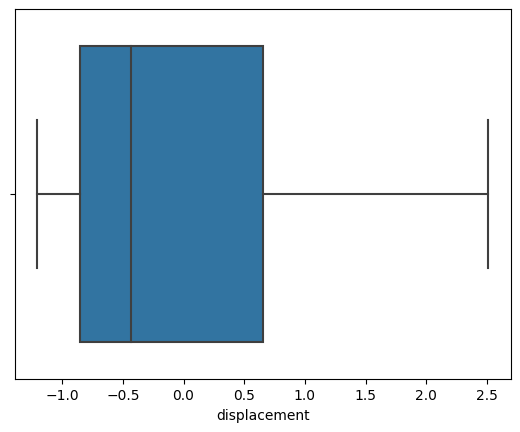

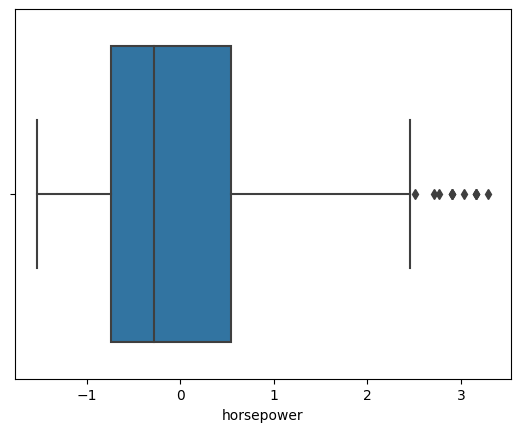

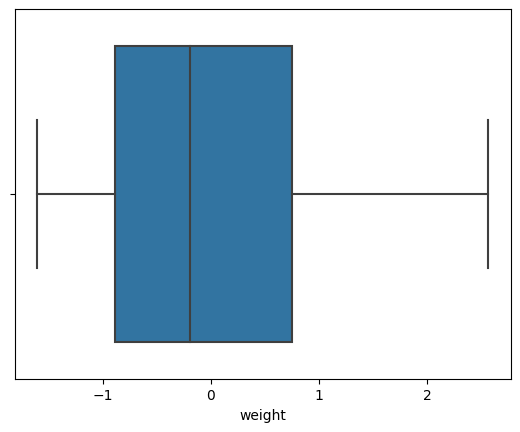

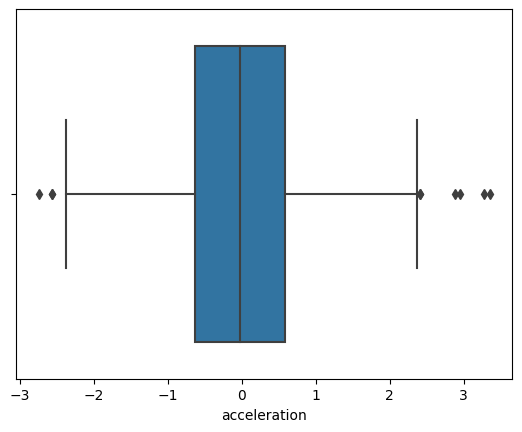

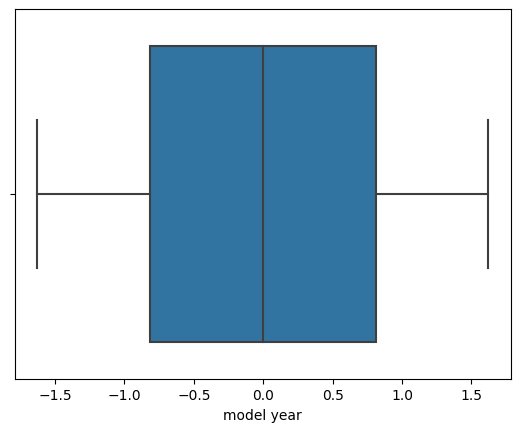

In [93]:
for col in numeric_columns:
    sns.boxplot(x=col, data=df)
    plt.show()

In [27]:

def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-1.5*IQR
    higher_range = Q3+1.5*IQR
    return lower_range, higher_range

outliers_columns = ["mpg", "horsepower", "acceleration"]

cleaned_df = df
for outlier_col in outliers_columns:
    lower, upper = remove_outlier(df[outlier_col])
    cleaned_df[outlier_col] = np.where(cleaned_df[outlier_col]>upper, upper, cleaned_df[outlier_col])
    cleaned_df[outlier_col] = np.where(cleaned_df[outlier_col]<lower, lower, cleaned_df[outlier_col])
    
cleaned_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
207,20.0,4,130.0,102.0,3150,15.7,76,False,False,True
395,32.0,4,135.0,84.0,2295,11.6,82,True,False,False
169,20.0,6,232.0,100.0,2914,16.0,75,True,False,False
376,37.0,4,91.0,68.0,2025,18.2,82,False,True,False
114,26.0,4,98.0,90.0,2265,15.5,73,False,False,True


In [28]:
Y=cleaned_df["mpg"]
X =cleaned_df.drop(["mpg"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30, random_state=1)

model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)
print("Train:: ", model_lr.score(X_train,Y_train))
print("Test:: ", model_lr.score(X_test, Y_test))

Train::  0.8155527471646685
Test::  0.8415417614056202


In [96]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

print("Train:: ", poly_clf.score(X_train2, Y_train))
print("Test:: ", poly_clf.score(X_test2, Y_test))

Train::  0.9034698975823044
Test::  0.8657945764108772


In [97]:
cleaned_df.skew()

mpg               0.454934
cylinders         0.526922
displacement      0.719645
horsepower        0.935495
weight            0.531063
acceleration      0.163862
model year        0.011535
origin_America   -0.521133
origin_Asia       1.517553
origin_Europe     1.709131
dtype: float64

In [98]:
df.skew()

mpg               0.454934
cylinders         0.526922
displacement      0.719645
horsepower        0.935495
weight            0.531063
acceleration      0.163862
model year        0.011535
origin_America   -0.521133
origin_Asia       1.517553
origin_Europe     1.709131
dtype: float64

In [99]:
# Approach1 Linear with outlier
# Approach2 Linear without outlier
# Approach3 Poly with outlier
# Approach4 Poly without outlier
# Approach5 Standarization
# Approach6 Normalization

from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()

In [101]:
# implement 

df["mpg"] = std_scale.fit_transform(df[["mpg"]])


Y=df["mpg"]
X =df.drop(["mpg"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.30,random_state=1)

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

# y_pred = poly_clf.predict(X_test2, Y_test)


print("Train:: ", poly_clf.score(X_train2, Y_train))
print("Test:: ", poly_clf.score(X_test2, Y_test))

Train::  0.9034698975823044
Test::  0.8657945764108772


In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
# Standardization Approach
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()


df["cylinders"] = std_scale.fit_transform(df[["cylinders"]])

df["displacement"] = std_scale.fit_transform(df[["displacement"]])

df["horsepower"] = std_scale.fit_transform(df[["horsepower"]])

df["weight"] = std_scale.fit_transform(df[["weight"]])

df["acceleration"] = std_scale.fit_transform(df[["acceleration"]])

df["model year"] = std_scale.fit_transform(df[["model year"]])

In [104]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Asia,origin_Europe
0,-0.706560,1.498191,1.090604,0.713692,0.630870,-1.320595,-1.627426,True,False,False
1,-1.090999,1.498191,1.503514,1.666741,0.854333,-1.506489,-1.627426,True,False,False
2,-0.706560,1.498191,1.196232,1.258291,0.550470,-1.692383,-1.627426,True,False,False
3,-0.962852,1.498191,1.061796,1.258291,0.546923,-1.320595,-1.627426,True,False,False
4,-0.834706,1.498191,1.042591,0.985992,0.565841,-1.878278,-1.627426,True,False,False


In [105]:
# Decide between X and Y axis, Y axis will always be the dependent variable
X = df.drop(["mpg"], axis = 1)
Y = df[["mpg"]]

In [106]:
# Split the train and test data (Usually 70-30, can choose 75-25, 80,20, 85,15)
# random_state is never to be used in real life scenario (This is only for class purpose)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [107]:
# Instantiate the model
model_lr = LinearRegression()

In [108]:
# Fit the model with the train data
model_lr.fit(X_train, Y_train)

LinearRegression()

In [109]:
model_lr.score(X_train, Y_train)

0.8155527471646684

In [110]:
model_lr.score(X_test, Y_test)

0.8415417614056212

In [111]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Degree can be varied to play around and check when model is over fitting
# poly = PolynomialFeatures(degree = 1, interaction_only = True)
poly = PolynomialFeatures(degree = 2, interaction_only = True)
# poly = PolynomialFeatures(degree = 3, interaction_only = True)
# poly = PolynomialFeatures(degree = 4, interaction_only = True)

X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

In [112]:
print(poly_clf.score(X_train2, Y_train))

print(poly_clf.score(X_test2, Y_test))

0.9034698975823044
0.8657945764108772


In [29]:
# Without outliers

std_cleaned_df = cleaned_df

# Standardization Approach
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()


std_cleaned_df["cylinders"] = std_scale.fit_transform(std_cleaned_df[["cylinders"]])

std_cleaned_df["displacement"] = std_scale.fit_transform(std_cleaned_df[["displacement"]])

std_cleaned_df["horsepower"] = std_scale.fit_transform(std_cleaned_df[["horsepower"]])

std_cleaned_df["weight"] = std_scale.fit_transform(std_cleaned_df[["weight"]])

std_cleaned_df["acceleration"] = std_scale.fit_transform(std_cleaned_df[["acceleration"]])

std_cleaned_df["model year"] = std_scale.fit_transform(std_cleaned_df[["model year"]])


Y = std_cleaned_df[["mpg"]]
X = std_cleaned_df.drop(["mpg"], axis = 1)


In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [115]:
# Instantiate the model
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)
# Fit the model with the train data
print("Linear std + removed outliers")
print("Test::", model_lr.score(X_test, Y_test))
print("Train::", model_lr.score(X_train, Y_train))

Linear std + removed outliers
Test:: 0.8415417614056212
Train:: 0.8155527471646684


In [116]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Degree can be varied to play around and check when model is over fitting
# poly = PolynomialFeatures(degree = 1, interaction_only = True)
poly = PolynomialFeatures(degree = 2, interaction_only = True)
# poly = PolynomialFeatures(degree = 3, interaction_only = True)
# poly = PolynomialFeatures(degree = 4, interaction_only = True)

X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

In [117]:
print("Polynomial + removed outliers + standarization")
print("Train: ", poly_clf.score(X_train2, Y_train))
print("Test: ", poly_clf.score(X_test2, Y_test))

Polynomial + removed outliers + standarization
Train:  0.9034698975823044
Test:  0.8657945764108773


In [30]:
from sklearn.preprocessing import MinMaxScaler
min_max_scale = MinMaxScaler()


min_max_cleaned_df = cleaned_df

min_max_cleaned_df["cylinders"] = min_max_scale.fit_transform(min_max_cleaned_df[["cylinders"]])

min_max_cleaned_df["displacement"] = min_max_scale.fit_transform(min_max_cleaned_df[["displacement"]])

min_max_cleaned_df["horsepower"] = min_max_scale.fit_transform(min_max_cleaned_df[["horsepower"]])

min_max_cleaned_df["weight"] = min_max_scale.fit_transform(min_max_cleaned_df[["weight"]])

min_max_cleaned_df["acceleration"] = min_max_scale.fit_transform(min_max_cleaned_df[["acceleration"]])

min_max_cleaned_df["model year"] = min_max_scale.fit_transform(min_max_cleaned_df[["model year"]])


Y = min_max_cleaned_df[["mpg"]]
X = min_max_cleaned_df.drop(["mpg"], axis = 1)


In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

# Instantiate the model
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)
# Fit the model with the train data
print("Linear + removed outliers + Normalization")
print("Test::", model_lr.score(X_test, Y_test))
print("Train::", model_lr.score(X_train, Y_train))

Linear + removed outliers + Normalization
Test:: 0.8415417614056209
Train:: 0.8155527471646684


In [120]:

# Degree can be varied to play around and check when model is over fitting
# poly = PolynomialFeatures(degree = 1, interaction_only = True)
poly = PolynomialFeatures(degree = 2, interaction_only = True)
# poly = PolynomialFeatures(degree = 3, interaction_only = True)
# poly = PolynomialFeatures(degree = 4, interaction_only = True)

X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, Y_train)

y_pred = poly_clf.predict(X_test2)

In [121]:
print("Polynomial + removed outliers + Normalization")
print("Train: ", poly_clf.score(X_train2, Y_train))
print("Test: ", poly_clf.score(X_test2, Y_test))

Polynomial + removed outliers + Normalization
Train:  0.899936638042783
Test:  0.8602126764240545


In [122]:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import KNN
from sklearn.neighbors import KNeighborsClassifier

In [123]:
model_knn = KNeighborsClassifier()

In [124]:
Y=df["mpg"]
X=df.drop("mpg", axis=1)

# std_df
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

from sklearn.svm import SVR

kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} 
# model_svr = SVR()


for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model_svr = SVR(kernel=kernel, C=8.2)
    model_svr.fit(X_train, Y_train)
    print("\n Kernel: degree=3", kernel)
    print("train: ",model_svr.score(X_train, Y_train))
    print("test: ", model_svr.score(X_test, Y_test))


 Kernel: degree=3 linear
train:  0.8025605557324664
test:  0.8514446730561045

 Kernel: degree=3 poly
train:  0.9284056080554445
test:  0.8705170378096889

 Kernel: degree=3 rbf
train:  0.9275317913340557
test:  0.8937792630601116

 Kernel: degree=3 sigmoid
train:  -1118.8592056435136
test:  -1566.0151301939788


In [125]:
Y=std_df["mpg"]
X=std_df.drop("mpg", axis=1)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

from sklearn.svm import SVR

kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} 
# model_svr = SVR()


for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model_svr = SVR(kernel=kernel, C=2)
    model_svr.fit(X_train, Y_train)
    print("\n Kernel: degree=3", kernel)
    print("train: ",model_svr.score(X_train, Y_train))
    print("test: ", model_svr.score(X_test, Y_test))


 Kernel: degree=3 linear
train:  0.7977806030916833
test:  0.8517169040142674

 Kernel: degree=3 poly
train:  0.9172537993069102
test:  0.8712038039763785

 Kernel: degree=3 rbf
train:  0.9127019671979639
test:  0.8960847184745958

 Kernel: degree=3 sigmoid
train:  -53.64526990840431
test:  -59.411748329800794


In [126]:

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model_svr = SVR(kernel=kernel)
    model_svr.fit(X_train, Y_train)
    print("\n Kernel: ", kernel)
    print("train: ",model_svr.score(X_train, Y_train))
    print("test: ", model_svr.score(X_test, Y_test))
    




 Kernel:  linear
train:  0.7921744204366307
test:  0.8520125525558149

 Kernel:  poly
train:  0.9111837904053559
test:  0.8718699118801551

 Kernel:  rbf
train:  0.9004751003836432
test:  0.8976209332437043

 Kernel:  sigmoid
train:  -14.590013254601828
test:  -19.956100131907128


In [37]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin_America', 'origin_Asia',
       'origin_Europe'],
      dtype='object')

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# std_cleaned_df,  cleaned_df, min_max_cleaned_df

# std_cleaned_df, min_max_cleaned_df
Y=std_cleaned_df["mpg"]
X=std_cleaned_df.drop(columns=["mpg"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')
X_test = X_test.astype('float32')
Y_test = Y_test.astype('float32')

model=Sequential()
model.add(Dense(units=6,activation="relu",input_dim=9,kernel_initializer='uniform'))
model.add(Dense(units=20,kernel_initializer='uniform',activation="relu"))
model.add(Dense(units=20,kernel_initializer='uniform',activation="relu"))
model.add(Dense(units=20,kernel_initializer='uniform',activation="relu"))
model.add(Dense(units=20,kernel_initializer='uniform',activation="relu"))
model.add(Dense(units=10,kernel_initializer='uniform',activation="relu"))
model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])

model.fit(X_train, Y_train, batch_size=15, epochs=30, validation_split=0.20)

Epoch 1/30
15/15 [==============================] - 2s 20ms/step - loss: 632.4603 - accuracy: 0.0000e+00 - val_loss: 559.1834 - val_accuracy: 0.0000e+00
Epoch 2/30
15/15 [==============================] - 0s 4ms/step - loss: 630.1401 - accuracy: 0.0000e+00 - val_loss: 556.6775 - val_accuracy: 0.0000e+00
Epoch 3/30
15/15 [==============================] - 0s 4ms/step - loss: 627.1001 - accuracy: 0.0000e+00 - val_loss: 553.1577 - val_accuracy: 0.0000e+00
Epoch 4/30
15/15 [==============================] - 0s 4ms/step - loss: 622.4133 - accuracy: 0.0000e+00 - val_loss: 547.2628 - val_accuracy: 0.0000e+00
Epoch 5/30
15/15 [==============================] - 0s 4ms/step - loss: 613.3623 - accuracy: 0.0000e+00 - val_loss: 533.9777 - val_accuracy: 0.0000e+00
Epoch 6/30
15/15 [==============================] - 0s 4ms/step - loss: 590.1337 - accuracy: 0.0000e+00 - val_loss: 496.1537 - val_accuracy: 0.0000e+00
Epoch 7/30
15/15 [==============================] - 0s 3ms/step - loss: 521.9609 - accu